# Informações adicionais

## Modelagem dos dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

In [2]:
dados = pd.read_csv('Anuário Estatístico 2019 - Evolução da produção de gás natural, por localização.csv', sep = ';', decimal = ',')

In [3]:
rj_offshore = dados.loc[(dados['UF'] == 'Rio de Janeiro') & (dados['Localização'] == 'Mar')]
rj_total = dados.loc[dados['UF'] == 'Rio de Janeiro']

In [4]:
def modelagem(n):
    n['Produção de gás natural (milhões m3)'] = n['Produção de gás natural (milhões m3)'].mul(1000000)
    n = n.rename(columns = {'Produção de gás natural (milhões m3)' : 'Produção de gás natural (m³)'})
    n = n.groupby(['Ano'])['Produção de gás natural (m³)'].sum().to_frame().reset_index()
    return n

rj_offshore = modelagem(rj_offshore)
rj_total = modelagem(rj_total)

In [5]:
def grafico(n):
    plt.figure(figsize = (10, 5))
    plt.xticks(n['Ano'])
    if n is rj_offshore:
        sns.barplot(x = 'Ano', y = 'Produção de gás natural (m³)', color = 'blue', data = rj_offshore)
        plt.title('Produção de gás natural offshore no estado do Rio de Janeiro', fontsize = 16, fontweight = 'bold')
    elif n is rj_total:
        sns.barplot(x = 'Ano', y = 'Produção de gás natural (m³)', color = 'black', data = rj_total)
        plt.title('Produção de gás natural total no estado do Rio de Janeiro', fontsize = 16, fontweight = 'bold')
    plt.show()

In [6]:
rj_offshore_ts = copy.deepcopy(rj_offshore)
rj_total_ts = copy.deepcopy(rj_total)

In [7]:
def time_series(time):
    time['Ano'] = pd.to_datetime(time['Ano'].astype(str), format = '%Y')
    time = time.set_index('Ano')
    return time

rj_offshore_ts = time_series(rj_offshore_ts) # [2, 0, 0] 
rj_total_ts = time_series(rj_total_ts) # [2, 0, 0]

In [8]:
#modelo_auto = auto_arima(rj_total_ts, m = 2, seasonal = False, trace = True)
#modelo_auto.summary()

In [9]:
modelo_rj_offshore = ARIMA(rj_offshore_ts, order = [2, 0, 0])
modelo_treinado_rj_offshore = modelo_rj_offshore.fit()

modelo_rj_total = ARIMA(rj_total_ts, order = [2, 0, 0])
modelo_treinado_rj_total = modelo_rj_total.fit()

In [10]:
previsoes_offshore = modelo_treinado_rj_offshore.forecast(steps = 2)[0]
previsoes_total = modelo_treinado_rj_total.forecast(steps = 2)[0]

## Gráfico da produção de gás natural onshore e sua previsão

O estado do Rio de Janeiro não possui uma produção de gás natural onshore registrada nesses dados.

 ## Gráfico da produção de gás natural offshore e sua previsão

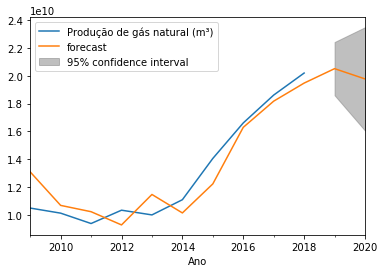

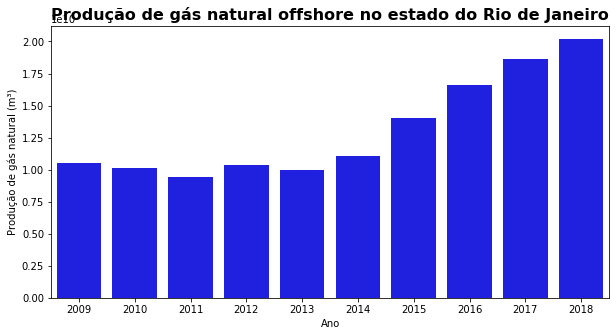

In [11]:
eixo_offshore = rj_offshore_ts.plot()

modelo_treinado_rj_offshore.plot_predict('2009-01-01', '2020-01-01', ax = eixo_offshore, plot_insample = False)
grafico(rj_offshore)

De acordo com ambos os gráficos, podemos perceber que a previsão de produção de gás natural offshore tende a ser levemente positiva no primeiro ano, mas podendo haver uma queda no segundo ano.

## Gráfico da produção de gás natural total e sua previsão

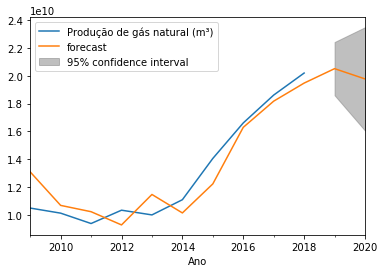

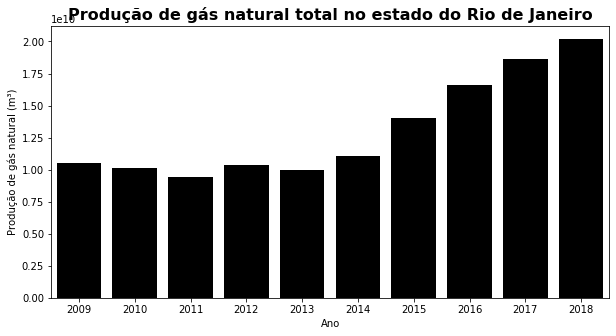

In [13]:
eixo_total = rj_total_ts.plot()
modelo_treinado_rj_total.plot_predict('2009-01-01', '2020-01-01', ax = eixo_total, plot_insample = False)
grafico(rj_total)

Como o estado só possui a produção offshore, a previsão total de gás natural é a mesma para a produção offshore.